# Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

# Credit Score Classification: Exploratory Data Analysis (EDA)

## Introduction
Credit score classification is a crucial task in the financial industry as it helps in assessing the creditworthiness of individuals. The objective of this EDA is to explore the dataset, understand its structure, identify patterns, and gain insights that will guide the subsequent modeling phase. This analysis will focus on cleaning the data, visualizing distributions, and identifying key features that influence credit scores.


## Importing Libraries

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.0f}'.format)

## Import Data

In [147]:
df=pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1825,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,_,809.98,27,22 Years and 1 Months,No,50,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4,Good,809.98,32,NaN,No,50,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4,Good,809.98,29,22 Years and 3 Months,No,50,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4,Good,809.98,31,22 Years and 4 Months,No,50,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1825,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4,Good,809.98,25,22 Years and 5 Months,No,50,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Description

### Data Source - https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data

ID: Unique ID of the record
Customer_ID: Unique ID of the customer

Month: Month of the year

Name: The name of the person

Age: The age of the person

SSN: Social Security Number of the person

Occupation: The occupation of the person

Annual_Income: The Annual Income of the person

Monthly_Inhand_Salary: Monthly in-hand salary of the person

Num_Bank_Accounts: The number of bank accounts of the person

Num_Credit_Card: Number of credit cards the person is having

Interest_Rate: The interest rate on the credit card of the person

Num_of_Loan: The number of loans taken by the person from the bank

Type_of_Loan: The types of loans taken by the person from the bank

Delay_from_due_date: The average number of days delayed by the person from the date of payment

Num_of_Delayed_Payment: Number of payments delayed by the person

Changed_Credit_Card: The percentage change in the credit card limit of the person

Num_Credit_Inquiries: The number of credit card inquiries by the person

Credit_Mix: Classification of Credit Mix of the customer

Outstanding_Debt: The outstanding balance of the person

Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer

Credit_History_Age: The age of the credit history of the person

Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.

Total_EMI_per_month: The total EMI per month of the person

Amount_invested_monthly: The monthly amount invested by the person

Payment_Behaviour: The payment behaviour of the person

Monthly_Balance: The monthly balance left in the account of the person

Credit_Score: The credit score of the person

# Exploratory Data Analysis

In [148]:
df.shape

(100000, 28)

In [149]:
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1825,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4,_,809.98,27,22 Years and 1 Months,No,50,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4,Good,809.98,32,NaN,No,50,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [150]:
# Checking for Unique values
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [151]:
# Dropping columns from the DataFrame that do not provide predictive value for our analysis or modeling

df.drop(columns=['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age'],inplace=True)

In [152]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998,100000,100000,100000,100000,98035,100000,100000
mean,4194,17,22,72,21,28,32,1403
std,3184,117,129,466,15,193,5,8306
min,304,-1,0,1,-5,0,20,0
25%,1626,3,4,8,10,3,28,30
50%,3094,6,5,13,18,6,32,69
75%,5957,7,7,20,28,9,36,161
max,15205,1798,1499,5797,67,2597,50,82331


In [153]:
# Checking unique value counts in all column

unique_value_count=[]
for i in df.columns:
    unique_value_count.append(df[i].unique().size)

In [154]:
pd.DataFrame({"Feature":df.columns,"unique_value":unique_value_count})

,Feature,unique_value
0,Age,1788
1,Occupation,16
2,Annual_Income,18940
3,Monthly_Inhand_Salary,13236
4,Num_Bank_Accounts,943
5,Num_Credit_Card,1179
6,Interest_Rate,1750
7,Num_of_Loan,434
8,Delay_from_due_date,73
9,Num_of_Delayed_Payment,750


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [156]:
# Checking for null values
df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Data Cleaning

In [157]:
df.tail()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,25,Mechanic,39628.99,3359,4,6,7,2,23,7,11.5,3,_,502.38,35,No,35,60.97133255718485,High_spent_Large_value_payments,480,Poor
99996,25,Mechanic,39628.99,3359,4,6,7,2,18,7,11.5,3,_,502.38,41,No,35,54.18595028760385,High_spent_Medium_value_payments,497,Poor
99997,25,Mechanic,39628.99,3359,4,6,5729,2,27,6,11.5,3,Good,502.38,41,No,35,24.02847744864441,High_spent_Large_value_payments,517,Poor
99998,25,Mechanic,39628.99,3359,4,6,7,2,20,NaN,11.5,3,Good,502.38,34,No,35,251.67258219721603,Low_spent_Large_value_payments,319,Standard
99999,25,Mechanic,39628.99_,3359,4,6,7,2,18,6,11.5,3,Good,502.38,34,No,35,167.1638651610451,!@9#%8,394,Poor


In [158]:
df.Changed_Credit_Limit.unique().size

4384

In [159]:
df.Amount_invested_monthly.unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

Many numeric columns were classified as object datatype. Upon analysis, I discovered that several inappropriate data entries were present, which were not numeric. To clean all the columns efficiently, I created the following function that checks for non-numeric values and replaces them with empty values. 

In [160]:
df['Monthly_Balance'].replace(to_replace='__-333333333333333333333333333__',value=np.nan, inplace=True)

In [161]:
def clean_numeric(column):
    return pd.to_numeric(column.str.replace(r'[^\d.]', '', regex=True))

In [162]:
# removing all non-numeric characters in the numeric column and then convert the cleaned values to numeric type.

df['Age']= clean_numeric(df['Age'])
df['Annual_Income']= clean_numeric(df['Annual_Income'])
df['Num_of_Loan']= clean_numeric(df['Num_of_Loan'])
df['Num_of_Delayed_Payment']= clean_numeric(df['Num_of_Delayed_Payment'])
df['Changed_Credit_Limit']= clean_numeric(df['Changed_Credit_Limit'])
df['Outstanding_Debt']= clean_numeric(df['Outstanding_Debt'])
df['Amount_invested_monthly']= clean_numeric(df['Amount_invested_monthly'])
df['Monthly_Balance']= clean_numeric(df['Monthly_Balance'])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   float64
 10  Changed_Credit_Limit      97909 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

## Univariate Analysis  & Data preprocessing- numeric

In [164]:
df = df[~((df['Num_Credit_Card']==0) & (df['Num_of_Loan']==0))]

In [165]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,99996,99996,84994,99996,99996,99996,99996,99996,92994,97905,98031,99996,99996,99996,95517,97119
mean,120,176419,4194,17,22,72,11,21,31,10,28,1426,32,1403,637,402
std,685,1429647,3184,117,129,466,62,15,226,7,193,1155,5,8306,2043,214
min,14,7006,304,-1,0,1,0,-5,0,0,0,0,20,0,0,0
25%,25,19457,1626,3,4,8,2,10,9,5,3,566,28,30,75,270
50%,34,37579,3093,6,5,13,3,18,14,9,6,1166,32,69,136,336
75%,42,72785,5957,7,7,20,6,28,18,15,9,1947,36,161,266,470
max,8698,24198062,15205,1798,1499,5797,1496,67,4397,37,2597,4998,50,82331,10000,1602


Age
AxesSubplot(0.125,0.11;0.775x0.77)


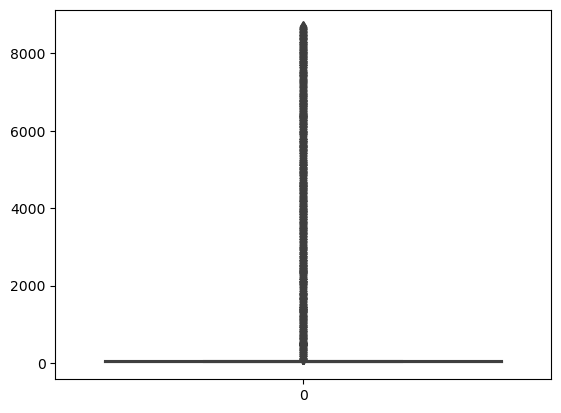

Annual_Income
AxesSubplot(0.125,0.11;0.775x0.77)


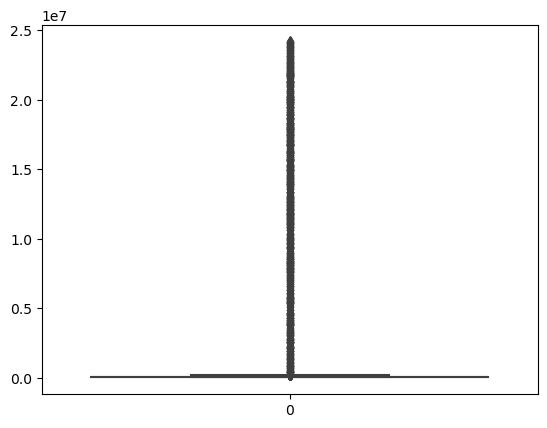

Monthly_Inhand_Salary
AxesSubplot(0.125,0.11;0.775x0.77)


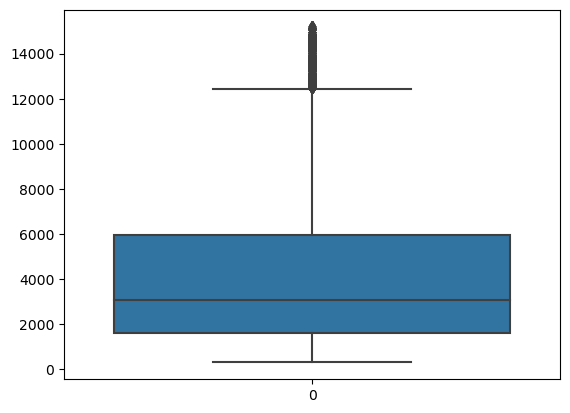

Num_Bank_Accounts
AxesSubplot(0.125,0.11;0.775x0.77)


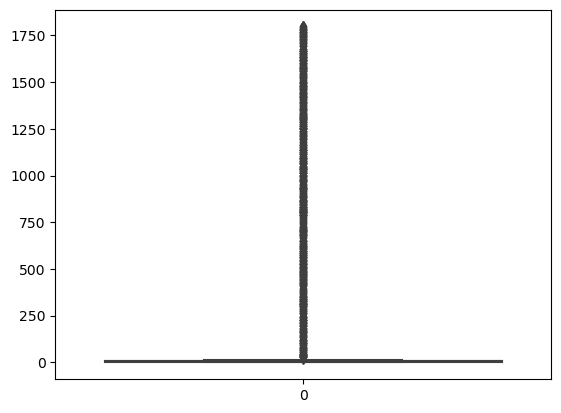

Num_Credit_Card
AxesSubplot(0.125,0.11;0.775x0.77)


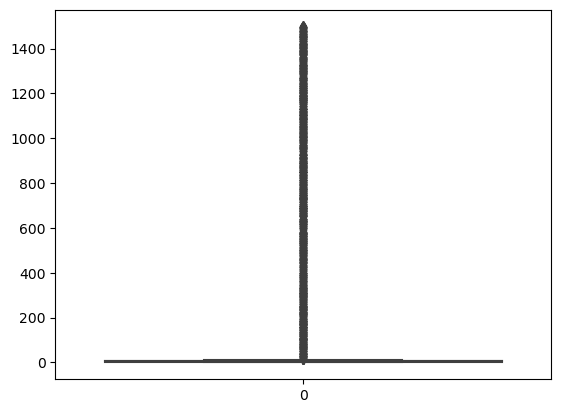

Interest_Rate
AxesSubplot(0.125,0.11;0.775x0.77)


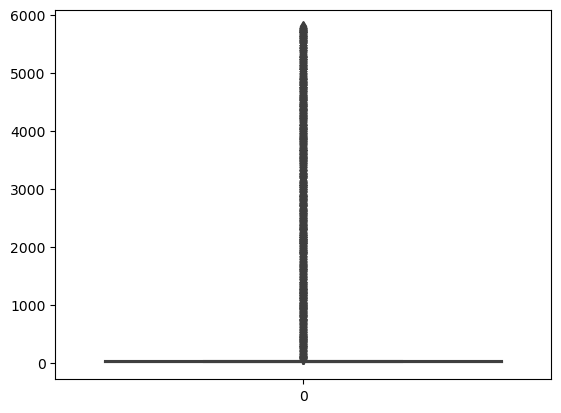

Num_of_Loan
AxesSubplot(0.125,0.11;0.775x0.77)


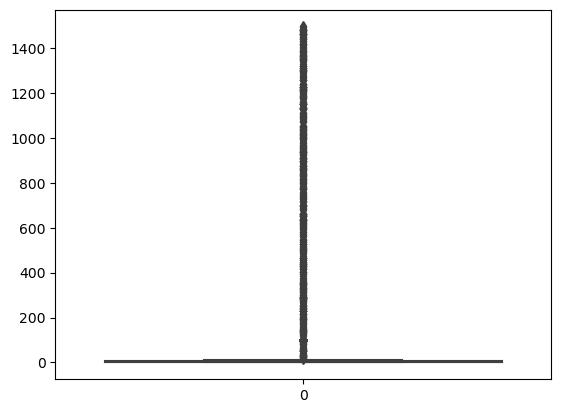

Delay_from_due_date
AxesSubplot(0.125,0.11;0.775x0.77)


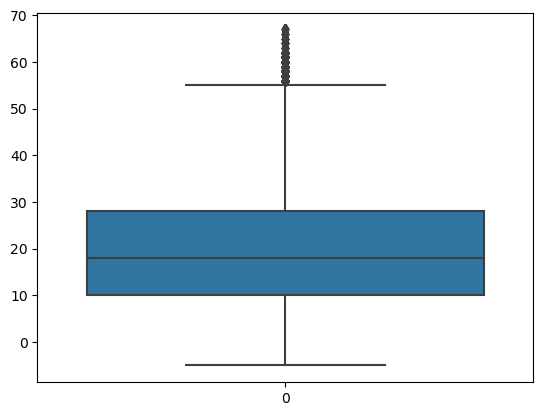

Num_of_Delayed_Payment
AxesSubplot(0.125,0.11;0.775x0.77)


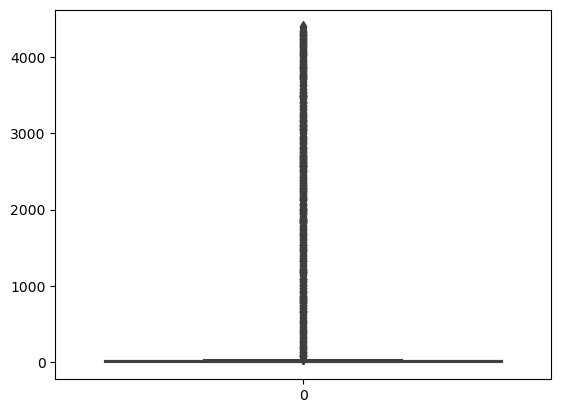

Changed_Credit_Limit
AxesSubplot(0.125,0.11;0.775x0.77)


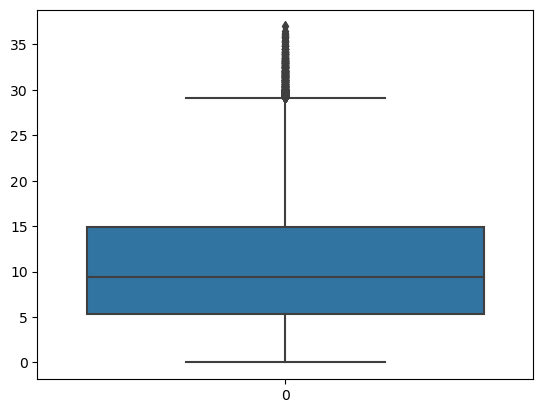

Num_Credit_Inquiries
AxesSubplot(0.125,0.11;0.775x0.77)


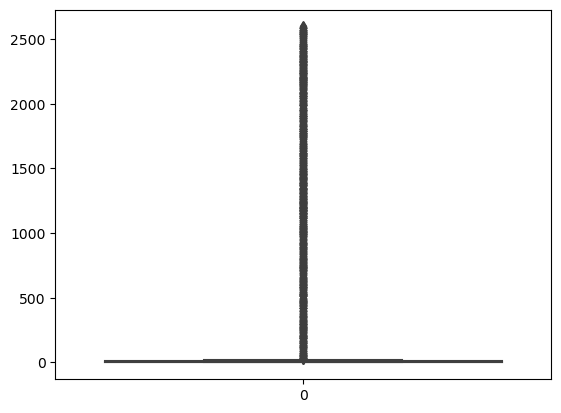

Outstanding_Debt
AxesSubplot(0.125,0.11;0.775x0.77)


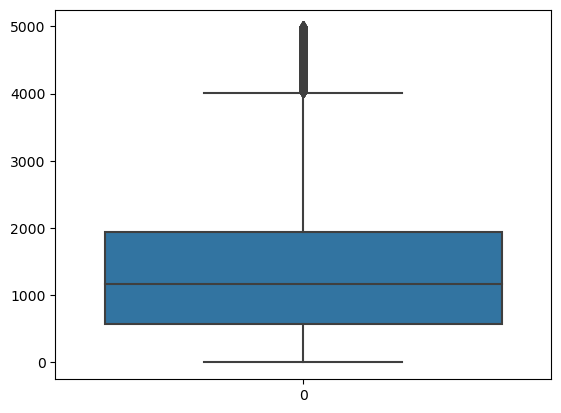

Credit_Utilization_Ratio
AxesSubplot(0.125,0.11;0.775x0.77)


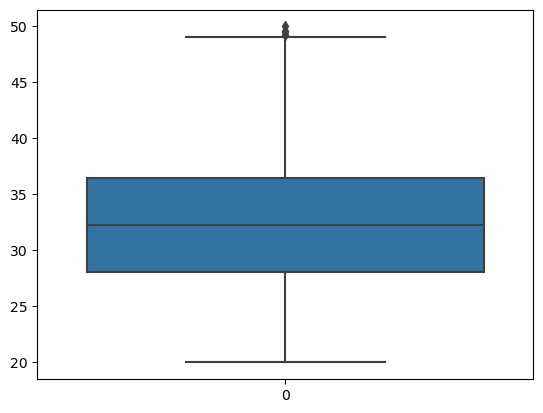

Total_EMI_per_month
AxesSubplot(0.125,0.11;0.775x0.77)


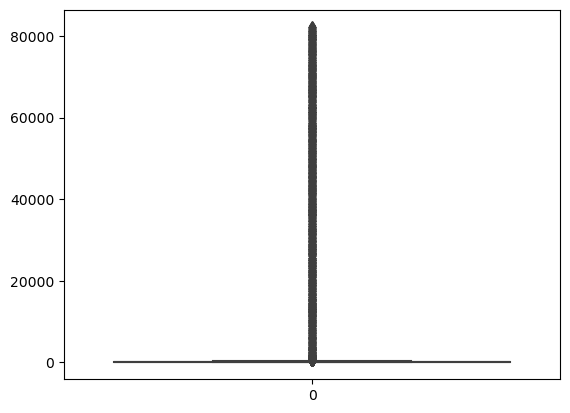

Amount_invested_monthly
AxesSubplot(0.125,0.11;0.775x0.77)


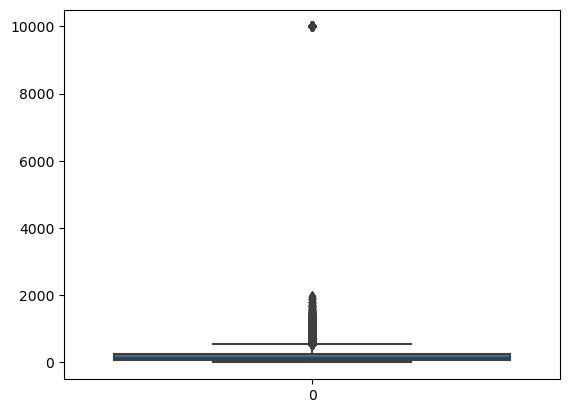

Monthly_Balance
AxesSubplot(0.125,0.11;0.775x0.77)


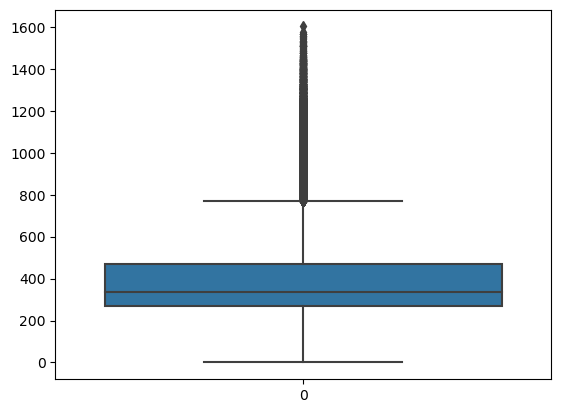

In [166]:
for i in df.select_dtypes('number'):
    print(i)
    print(sns.boxplot(df[i]))
    plt.show()

### Age

In [167]:
df['Age'].unique().size

1728

In [168]:
df['Age'].unique()

array([  23,  500,   28, ..., 4808, 2263, 1342], dtype=int64)

In [169]:
df['Age'][df['Age'] <=90].unique()

array([23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 56, 29, 49, 51, 50, 52], dtype=int64)

In [170]:
df['Age'][df['Age'] >=90].unique().size

1685

In [171]:
df['Age'][df['Age']>90]= np.nan

### Annual_Income

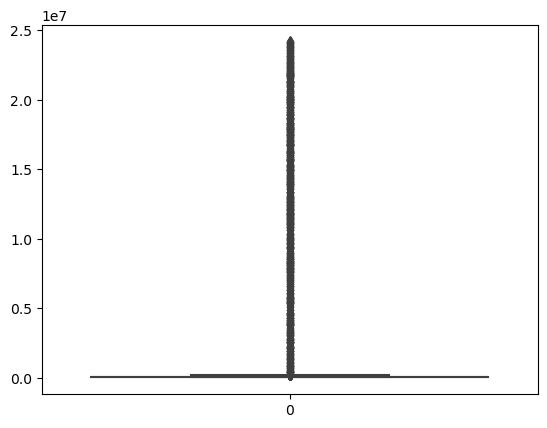

In [172]:
sns.boxplot(df['Annual_Income'])
plt.show()

In [173]:
df['Annual_Income'].min(), df['Annual_Income'].max()

(7005.93, 24198062.0)

In [174]:
q1 = df['Annual_Income'].quantile(.25)
q3 = df['Annual_Income'].quantile(.75)

IQR = q3-q1
print(q1,q3,IQR) 

ul = q3 + (2.05* IQR)
ll = q1 - (1.5* IQR)
print(ll,ul)

19456.9975 72785.025 53328.0275
-60535.04375 182107.48137499997


In [175]:
df[df['Annual_Income']> ul].shape

(999, 21)

In [176]:
df = df[~(df['Annual_Income']> ul)]

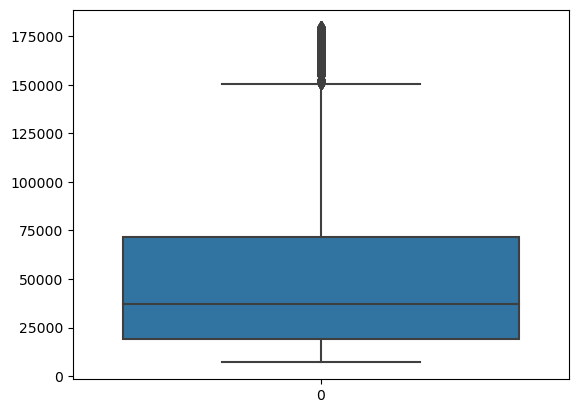

In [177]:
sns.boxplot(df['Annual_Income'])
plt.show()

### Monthly_Inhand_Salary

In [178]:
df['Monthly_Inhand_Salary'].unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333])

In [179]:
df['Monthly_Inhand_Salary'].mean()

4193.561619064863

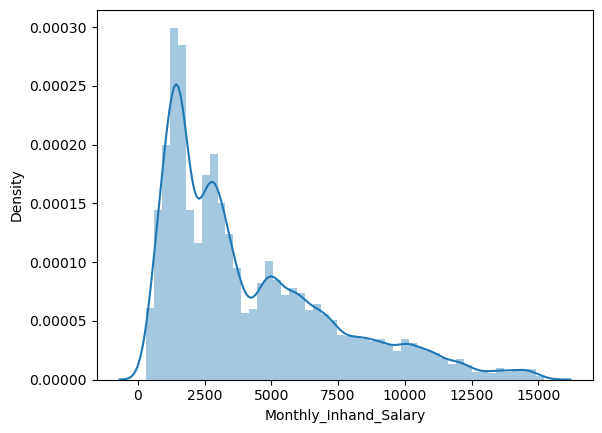

In [180]:
sns.distplot(df['Monthly_Inhand_Salary'])
plt.show()

### Num_Bank_Accounts

In [181]:
df['Num_Bank_Accounts'][df['Num_Bank_Accounts']<=10].value_counts()

 6     12861
 7     12702
 8     12641
 4     12059
 5     11994
 3     11842
 9      5394
 10     5192
 1      4433
 0      4281
 2      4267
-1        20
Name: Num_Bank_Accounts, dtype: int64

In [182]:
df['Num_Bank_Accounts'][df['Num_Bank_Accounts'] > 10 ] = np.nan

In [183]:
df['Num_Bank_Accounts'].replace(to_replace=-1, value=1, inplace=True)

### Num_Credit_Card

In [184]:
df['Num_Credit_Card'].unique()

array([   4, 1385,    5, ...,  955, 1430,  679], dtype=int64)

In [185]:
df['Num_Credit_Card'][df['Num_Credit_Card']<=10].value_counts()

5     18282
7     16457
6     16372
4     13890
3     13149
8      4899
10     4820
9      4591
2      2133
1      2112
0         9
Name: Num_Credit_Card, dtype: int64

In [186]:
df['Num_Credit_Card'][df['Num_Credit_Card']>10]= np.nan

In [187]:
df['Num_Credit_Card'].replace(to_replace=0, value=1, inplace=True)

### Interest_Rate

In [188]:
df['Interest_Rate'].unique().size

1740

In [189]:
#df['Interest_Rate'][df['Interest_Rate']<=34].value_counts()

In [190]:
#df['Interest_Rate'][df['Interest_Rate']>34].value_counts()

In [191]:
df.drop(columns='Interest_Rate', inplace=True)

### Num_of_Loan

In [192]:
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967,  100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,
        720, 1485,   49,  737, 1106,  466,  728,  313,  843,  597,  617,
        119,  663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931,
       1214,  186,  424, 1001, 1110, 1152,  457, 1433, 1187,   52, 1047,
       1035, 1347,   33,  193,  699,  329, 1451,  484,  132,  649,  995,
        545,  684, 1135, 1094, 1204,  654,   58,  348,  614, 1363,  323,
       1406, 1348,  430,  153, 1461,  905, 1312, 1424, 1154,   95, 1353,
       1228,  819, 1006,  795,  359, 1209,  590,  696, 1185, 1465,  911,
       1181,   70,  816, 1369,  143, 1416,  455,   55, 1096, 1474,  420,
       1131,  904,   89, 1259,  527, 1241,  449,  983,  418,  319,   23,
        238,  638,  138, 1480,  235,  280, 1070, 1484,  274,  494, 1459,
        404, 1354, 1495, 1391,  601, 1313, 1319,  898,  231,  752,  174,
        961, 1046,  834,  284,  438,  288, 1463, 11

In [193]:
df['Num_of_Loan'][df['Num_of_Loan']<=10].value_counts()

3    14971
2    14879
4    14612
0    10812
1    10482
6     7724
7     7272
5     7127
9     3659
8     3152
Name: Num_of_Loan, dtype: int64

In [194]:
df['Num_of_Loan'][df['Num_of_Loan']>10]= np.nan

### Delay_from_due_date

In [195]:
df['Delay_from_due_date']=df['Delay_from_due_date'].astype('str')

In [196]:
df['Delay_from_due_date'] =clean_numeric(df['Delay_from_due_date'])

In [197]:
df['Delay_from_due_date'].value_counts(ascending=True)

67      22
66      32
65      56
64      64
63      69
      ... 
10    3241
14    3275
8     3291
13    3377
15    3546
Name: Delay_from_due_date, Length: 68, dtype: int64

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Count'>

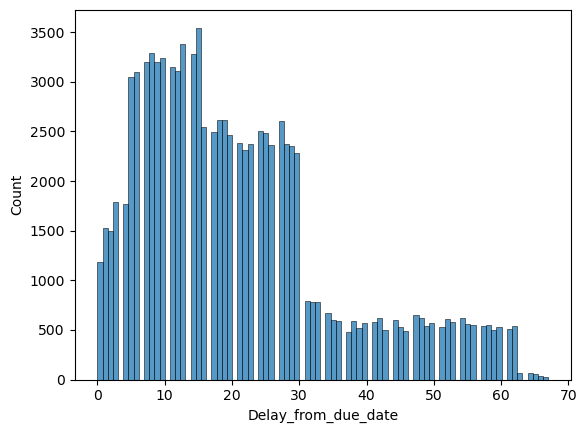

In [198]:
sns.histplot(data=df['Delay_from_due_date'])

<AxesSubplot:>

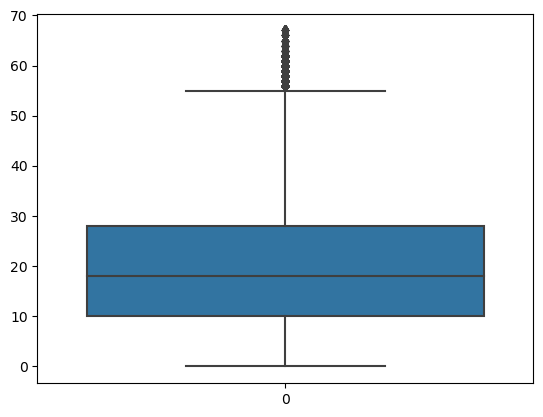

In [199]:
sns.boxplot(df['Delay_from_due_date'])

### Num_of_Delayed_Payment

In [200]:
df['Num_of_Delayed_Payment'][df['Num_of_Delayed_Payment']>28]

252     3318
284     3083
304     1338
409     3104
643      183
        ... 
99133   3336
99402   3392
99562   3688
99563    221
99825   2047
Name: Num_of_Delayed_Payment, Length: 728, dtype: float64

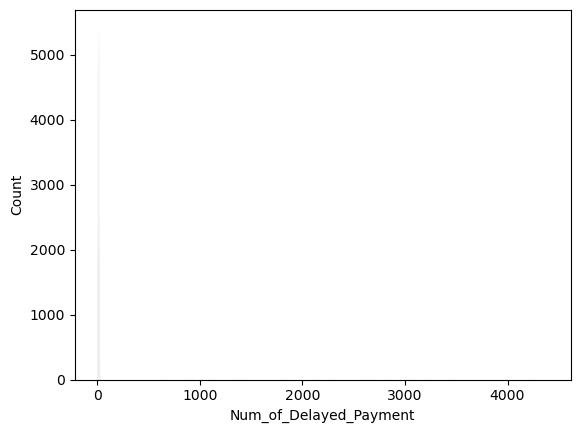

In [201]:
sns.histplot(data=df['Num_of_Delayed_Payment'])
plt.show()

In [202]:
df['Num_of_Delayed_Payment'][df['Num_of_Delayed_Payment']>28]= np.nan

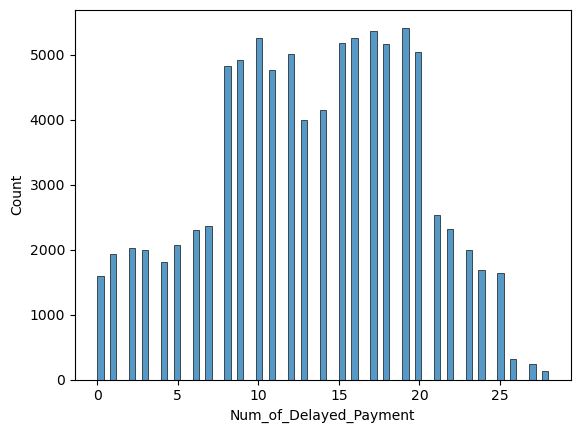

In [203]:
sns.histplot(data=df['Num_of_Delayed_Payment'])
plt.show()

### Changed_Credit_Limit

In [204]:
df['Changed_Credit_Limit'].unique()

array([11.27,   nan,  6.27, ..., 17.51, 25.16, 21.17])

In [205]:
df['Changed_Credit_Limit'].isnull().sum()

2067

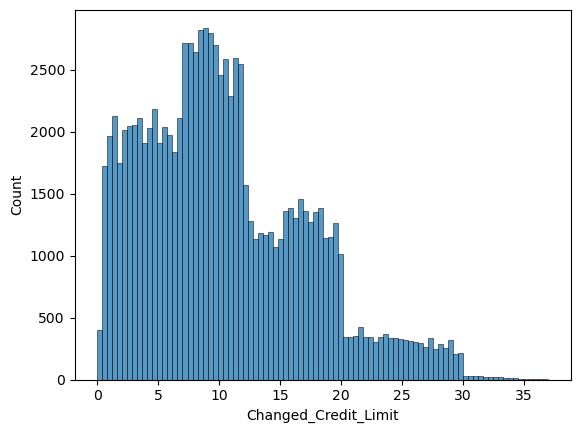

In [206]:
sns.histplot(data=df['Changed_Credit_Limit'])
plt.show()

### Num_Credit_Inquiries

In [207]:
df['Num_Credit_Inquiries'].unique().size

1215

In [208]:
df['Num_Credit_Inquiries'][df['Num_Credit_Inquiries']<30].value_counts()

4     11137
3      8800
6      8029
7      7986
2      7944
8      7796
1      7504
0      6895
5      5652
9      5238
11     5000
10     4883
12     4526
13     1468
14     1030
15      798
16      451
17      280
26        1
29        1
Name: Num_Credit_Inquiries, dtype: int64

In [209]:
df['Num_Credit_Inquiries'][df['Num_Credit_Inquiries']>17]= np.nan

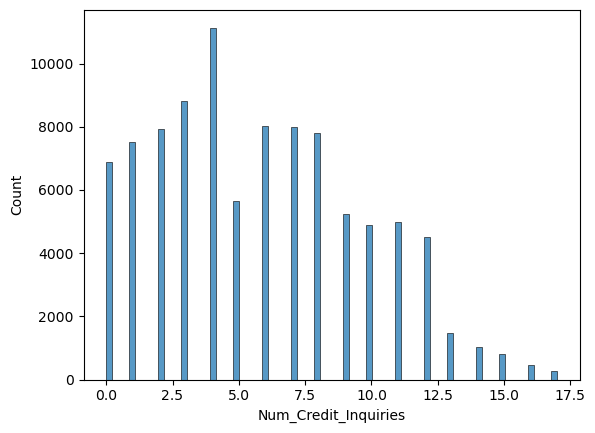

In [210]:
sns.histplot(data=df['Num_Credit_Inquiries'])
plt.show()

### Outstanding_Debt

In [211]:
df['Outstanding_Debt'].unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38])

<AxesSubplot:>

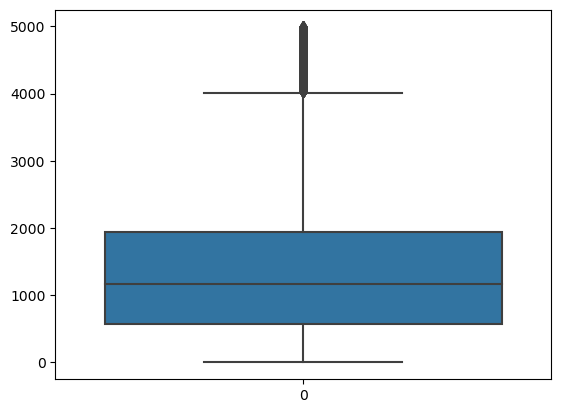

In [212]:
sns.boxplot(df['Outstanding_Debt'])

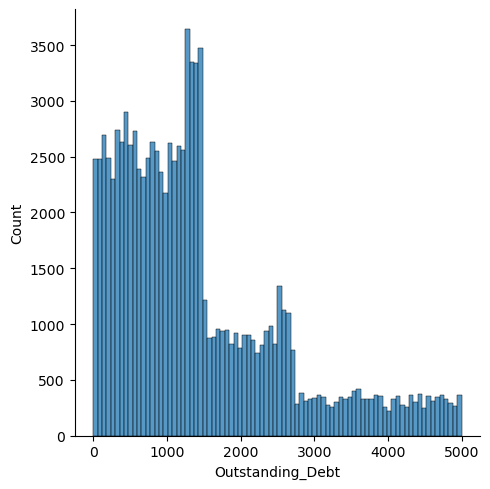

In [213]:
sns.displot(df['Outstanding_Debt'])

In [214]:
q1 = df['Outstanding_Debt'].quantile(.25)
q3 = df['Outstanding_Debt'].quantile(.75)

IQR = q3-q1
print(q1,q3,IQR) 

ul = q3 + (1.5* IQR)
ll = q1 - (1.5* IQR)
print(ll,ul)

566.08 1945.67 1379.5900000000001
-1503.3050000000003 4015.0550000000003


In [215]:
# df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x: ll if x<ll else ul if x> ul else x)

In [216]:
#sns.displot(df['Outstanding_Debt'])

### Credit_Utilization_Ratio

In [217]:
df['Credit_Utilization_Ratio']

0       27
1       32
2       29
3       31
4       25
        ..
99995   35
99996   41
99997   41
99998   34
99999   34
Name: Credit_Utilization_Ratio, Length: 98997, dtype: float64

<AxesSubplot:>

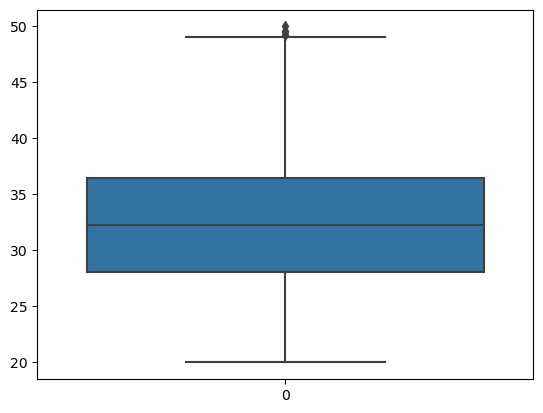

In [218]:
sns.boxplot(df['Credit_Utilization_Ratio'])

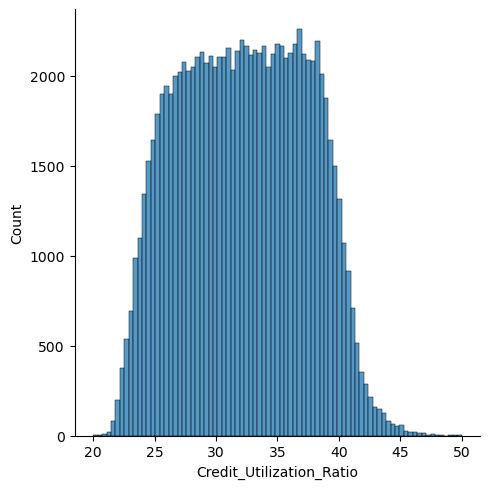

In [219]:
sns.displot(df['Credit_Utilization_Ratio'])

### Total_EMI_per_month

In [220]:
df['Total_EMI_per_month'].unique().size

14922

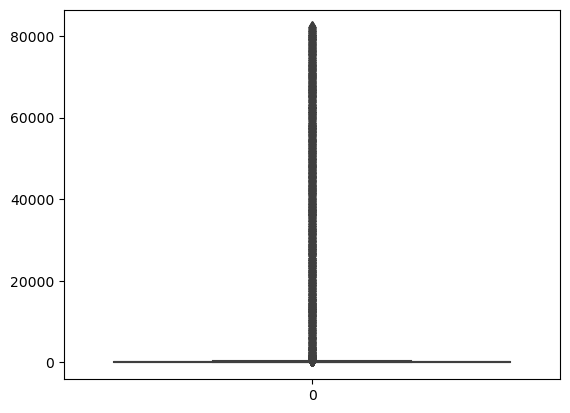

In [221]:
sns.boxplot(df['Total_EMI_per_month'])
plt.show()

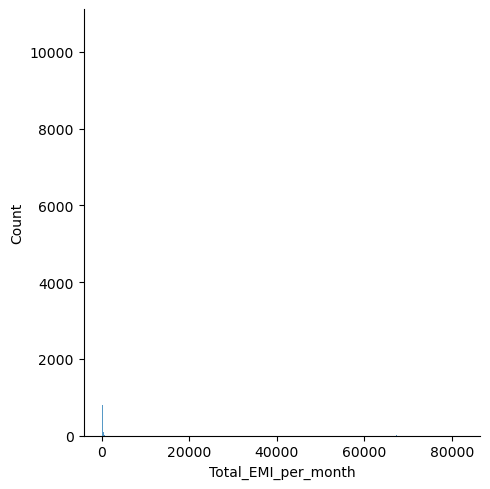

In [222]:
sns.displot(df['Total_EMI_per_month'])
plt.show()

In [223]:
q1 = df['Total_EMI_per_month'].quantile(.25)
q3 = df['Total_EMI_per_month'].quantile(.75)

IQR = q3-q1
print(q1,q3,IQR) 

ul = q3 + (1.5* IQR)
ll = q1 - (1.5* IQR)
print(ll,ul)

30.306660494686994 161.16319867530373 130.85653818061672
-165.97814677623808 357.4480059462288


In [224]:
df = df[~(df['Total_EMI_per_month']>ul)]

In [225]:
df.iloc[:,[2,3,4,5,6,12,15,16]][(df['Annual_Income'])<(df['Total_EMI_per_month'])]

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly


In [226]:
df = df[~((df['Annual_Income'])<(df['Total_EMI_per_month']))]

In [227]:
df = df[~((df['Monthly_Inhand_Salary'])<(df['Total_EMI_per_month']))]

In [228]:
df.shape

(92274, 20)

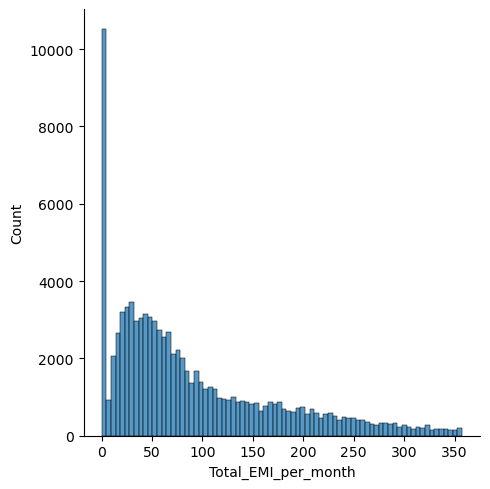

In [229]:
sns.displot(df['Total_EMI_per_month'])
plt.show()

In [230]:
df =df[~((df['Num_of_Loan']==0) & (df['Total_EMI_per_month']==0))]

In [231]:
df['Total_EMI_per_month'].value_counts().sort_values(ascending=False)

0      441
236      8
101      8
144      8
155      8
      ... 
73       1
14       1
38       1
25       1
201      1
Name: Total_EMI_per_month, Length: 11196, dtype: int64

### Amount_invested_monthly

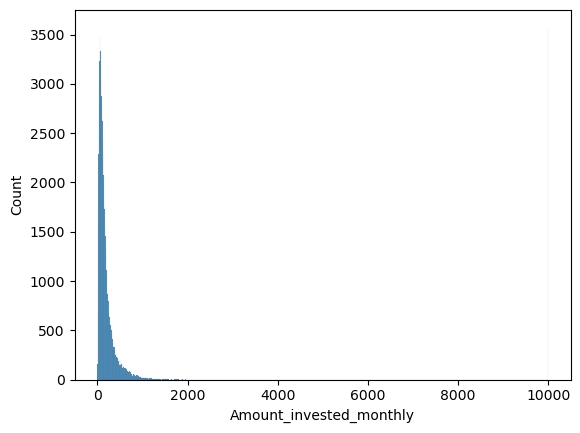

In [232]:
sns.histplot(df['Amount_invested_monthly'])
plt.show()

<AxesSubplot:>

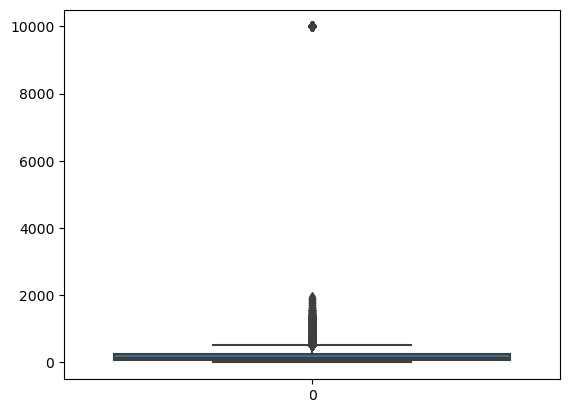

In [233]:
sns.boxplot(df['Amount_invested_monthly'])

In [234]:
df['Amount_invested_monthly'].min(), df['Amount_invested_monthly'].max()

(0.0, 10000.0)

In [235]:
q1 = df['Amount_invested_monthly'].quantile(.25)
q3 = df['Amount_invested_monthly'].quantile(.75)

IQR = q3-q1
print(q1,q3,IQR) 

ul = q3 + (1.5* IQR)
ll = q1 - (1.5* IQR)
print(ll,ul)

71.4906206630044 248.74172150094455 177.25110083794016
-194.38603059390584 514.6183727578548


In [236]:
df.iloc[:,[2,3,4,5,6,12,15,16]][df['Amount_invested_monthly']== 10000]

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly
18,143163,NaN,1,5,3,1303,247,10000
23,143163,12187,1,5,3,1303,247,10000
28,30690,2612,2,5,1,632,16,10000
121,31994,2942,6,6,2,818,45,10000
142,32285,2898,6,7,6,1283,103,10000
...,...,...,...,...,...,...,...,...
99874,118678,9964,4,4,4,995,237,10000
99879,118678,9964,4,4,4,995,237,10000
99919,20060,1524,8,5,NaN,909,45,10000
99951,59146,4909,3,6,1,418,27,10000


Identified 4,210 records with Amount_invested_monthly equal to 10,000. Out of these, 3,316 records have Amount_invested_monthly greater than Monthly_Inhand_Salary, which are considered invalid. These 3,316 invalid records have been removed.

In [237]:
df[(df['Amount_invested_monthly'])> (df['Monthly_Inhand_Salary'])].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,2763,2854,2854,2816,2791,2706,2854,2633,2790,2748,2854,2854,2854,2854,2769
mean,33,42347,3526,6,6,4,23,14,11,6,1540,32,97,10000,359
std,11,29025,2430,3,2,2,15,6,7,4,1202,5,78,0,158
min,14,7007,332,0,1,0,0,0,0,0,1,22,0,10000,4
25%,24,17904,1511,4,4,2,11,10,6,3,620,28,37,10000,263
50%,33,33891,2826,6,6,4,20,15,10,6,1273,32,70,10000,316
75%,41,62004,5191,8,7,6,29,18,16,9,2191,36,137,10000,418
max,56,121949,9983,10,10,9,67,28,34,17,4998,45,356,10000,992


In [238]:
df = df[~((df['Amount_invested_monthly'])> (df['Monthly_Inhand_Salary']))]

In [239]:
# sns.boxplot(df['Amount_invested_monthly'])

In [240]:
df =df[~(df['Amount_invested_monthly']== 10000)]

### Monthly_Balance

<AxesSubplot:>

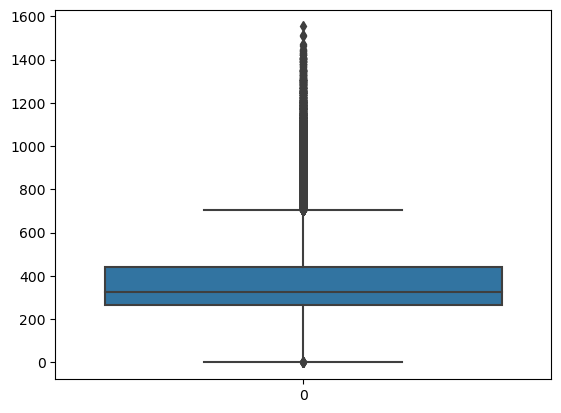

In [241]:
sns.boxplot(df['Monthly_Balance'])

<AxesSubplot:xlabel='Monthly_Balance', ylabel='Density'>

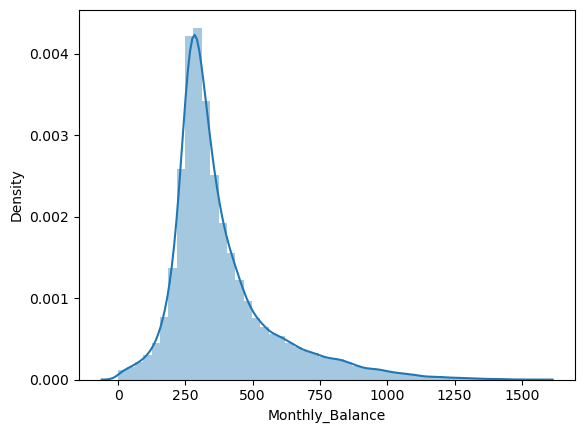

In [242]:
sns.distplot(df['Monthly_Balance'])

In [243]:
q1 = df['Monthly_Balance'].quantile(.25)
q3 = df['Monthly_Balance'].quantile(.75)

IQR = q3-q1
print(q1,q3,IQR) 

ul = q3 + (1.5* IQR)
ll = q1 - (1.5* IQR)
print(ll,ul)

264.97750168613396 440.9478736290365 175.97037194290255
1.0219437717801725 704.9034315433903


In [244]:
df[df['Monthly_Balance']>ul+400]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
562,18,Scientist,144547,11810,0,3,2,15,8,12,1,Good,1045,44,No,137,104,High_spent_Large_value_payments,1180,Standard
1728,30,Musician,173196,14258,4,7,1,9,5,6,4,Good,967,37,No,108,367,High_spent_Large_value_payments,1191,Good
1729,30,Musician,173196,14258,4,7,1,12,5,6,4,Good,967,34,No,108,460,High_spent_Medium_value_payments,1108,Good
1730,30,Musician,173196,14258,4,7,1,7,5,6,4,Good,967,41,No,108,284,High_spent_Medium_value_payments,1284,Good
1731,30,Musician,173196,14258,4,7,1,8,5,6,4,Good,967,39,No,108,139,High_spent_Large_value_payments,1419,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98091,32,Scientist,160728,13469,2,NaN,2,9,NaN,6,1,Good,1242,42,No,205,207,High_spent_Medium_value_payments,1185,Good
98092,32,Scientist,160728,13469,2,5,2,9,4,1,1,_,1242,36,No,205,112,High_spent_Large_value_payments,1270,Good
98258,32,Architect,175572,14422,5,4,3,10,4,1,0,Good,389,37,No,290,286,High_spent_Large_value_payments,1106,Poor
98259,32,Architect,175572,14422,5,4,3,10,2,6,0,Good,389,37,No,290,121,High_spent_Large_value_payments,1271,Poor


In [245]:
df.isnull().sum()

Age                          2168
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11710
Num_Bank_Accounts            1037
Num_Credit_Card              1806
Num_of_Loan                  3837
Delay_from_due_date             0
Num_of_Delayed_Payment       6062
Changed_Credit_Limit         1627
Num_Credit_Inquiries         2835
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3690
Payment_Behaviour               0
Monthly_Balance              2055
Credit_Score                    0
dtype: int64

## Univariate Analysis  & Data preprocessing- Categorical

In [246]:
df.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,78639,16,_______,5478
Credit_Mix,78639,4,Standard,29256
Payment_of_Min_Amount,78639,3,Yes,43766
Payment_Behaviour,78639,7,Low_spent_Small_value_payments,20982
Credit_Score,78639,3,Standard,41484


### Occupation

In [247]:
df['Occupation'].value_counts()

_______          5478
Lawyer           5277
Mechanic         5033
Architect        5008
Engineer         4994
Scientist        4938
Doctor           4927
Entrepreneur     4923
Developer        4902
Teacher          4861
Accountant       4853
Media_Manager    4849
Journalist       4698
Writer           4654
Manager          4632
Musician         4612
Name: Occupation, dtype: int64

In [248]:
df['Occupation'][df['Occupation']=='_______'] = np.nan

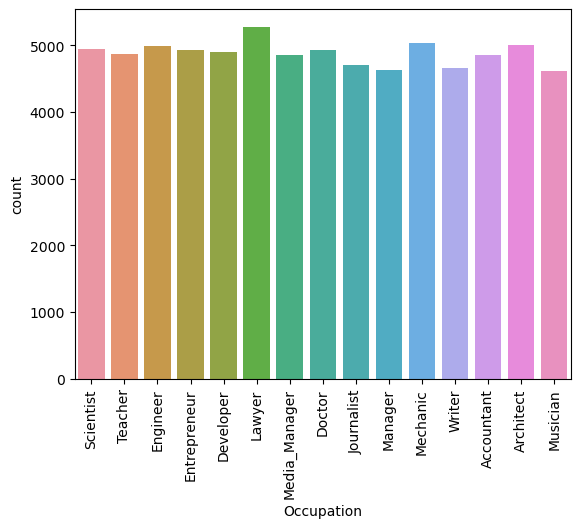

In [249]:
sns.countplot(x='Occupation', data=df)
plt.xticks(rotation=90)
plt.show()

In [250]:
import scipy.stats as stats

In [251]:
contingency_table = pd.crosstab(df['Occupation'], df['Credit_Score'])

In [252]:
pd.crosstab(df['Occupation'], df['Credit_Score'])

Credit_Score,Good,Poor,Standard
Occupation,,,
Accountant,798,1563,2492
Architect,805,1510,2693
Developer,820,1535,2547
Doctor,803,1443,2681
Engineer,817,1628,2549
Entrepreneur,748,1649,2526
Journalist,819,1464,2415
Lawyer,850,1575,2852
Manager,762,1445,2425


In [253]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=137.02446428287246, pvalue=2.5459368381701944e-16, dof=28, expected_freq=array([[ 773.11292902, 1521.41725783, 2558.46981315],
       [ 797.80538812, 1570.00981397, 2640.18479791],
       [ 780.91893222, 1536.77877558, 2584.3022922 ],
       [ 784.90158691, 1544.61628463, 2597.48212846],
       [ 795.57510149, 1565.6208089 , 2632.80408961],
       [ 784.26436216, 1543.36228318, 2595.37335466],
       [ 748.42046992, 1472.82470169, 2476.75482839],
       [ 840.65875261, 1654.34141141, 2781.99983598],
       [ 737.90626153, 1452.13367778, 2441.96006069],
       [ 801.78804281, 1577.84732303, 2653.36463416],
       [ 772.47570427, 1520.16325638, 2556.36103935],
       [ 734.72013778, 1445.86367053, 2431.41619169],
       [ 786.65395498, 1548.06478862, 2603.28125641],
       [ 774.38737852, 1523.92526073, 2562.68736075],
       [ 741.41099766, 1459.03068575, 2453.55831659]]))

### Credit_Mix

In [254]:
df['Credit_Mix'].value_counts()

Standard    29256
Good        17107
Bad         16499
_           15777
Name: Credit_Mix, dtype: int64

In [255]:
df['Credit_Mix'].replace(to_replace='_',value = np.nan, inplace=True)

### Payment_Behaviour

In [256]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      20982
High_spent_Medium_value_payments    13595
Low_spent_Medium_value_payments     10730
High_spent_Large_value_payments     10158
High_spent_Small_value_payments      8992
Low_spent_Large_value_payments       8233
!@9#%8                               5949
Name: Payment_Behaviour, dtype: int64

In [257]:
df['Payment_Behaviour'].replace(to_replace='!@9#%8',value = np.nan, inplace=True)

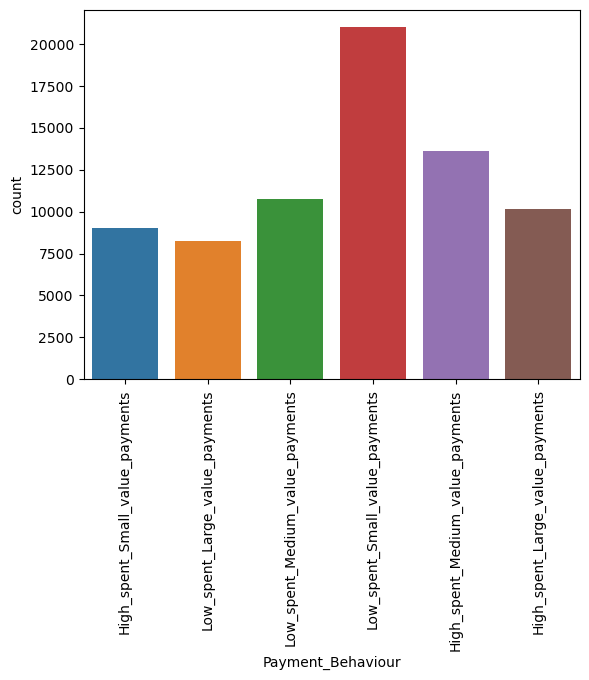

In [258]:
sns.countplot(x='Payment_Behaviour', data=df)
plt.xticks(rotation=90)
plt.show()

### Payment_of_Min_Amount

In [259]:
df['Payment_of_Min_Amount'].value_counts()

Yes    43766
No     25351
NM      9522
Name: Payment_of_Min_Amount, dtype: int64

In [260]:
df['Payment_of_Min_Amount'].replace(to_replace='NM',value = np.nan, inplace=True)

### Credit_Score

In [261]:
df['Credit_Score'].value_counts()

Standard    41484
Poor        24653
Good        12502
Name: Credit_Score, dtype: int64

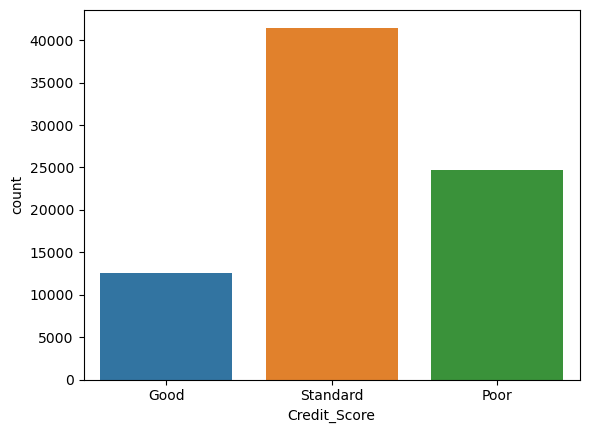

In [262]:
sns.countplot(x='Credit_Score', data=df)
plt.show()

In [263]:
# Handling null values

In [264]:
df.isnull().sum()

Age                          2168
Occupation                   5478
Annual_Income                   0
Monthly_Inhand_Salary       11710
Num_Bank_Accounts            1037
Num_Credit_Card              1806
Num_of_Loan                  3837
Delay_from_due_date             0
Num_of_Delayed_Payment       6062
Changed_Credit_Limit         1627
Num_Credit_Inquiries         2835
Credit_Mix                  15777
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount        9522
Total_EMI_per_month             0
Amount_invested_monthly      3690
Payment_Behaviour            5949
Monthly_Balance              2055
Credit_Score                    0
dtype: int64

In [265]:
df = df[~(df.isnull().sum(axis=1)>3)]

In [266]:
df.shape

(77872, 20)

In [267]:
df['Credit_Score'].value_counts(normalize=True)*100

Standard   53
Poor       31
Good       16
Name: Credit_Score, dtype: float64

In [268]:
temp = df.dropna()

In [269]:
temp.shape

(29283, 20)

In [270]:
temp['Credit_Score'].value_counts(normalize=True)*100

Standard   53
Poor       31
Good       15
Name: Credit_Score, dtype: float64

Age
AxesSubplot(0.125,0.11;0.775x0.77)


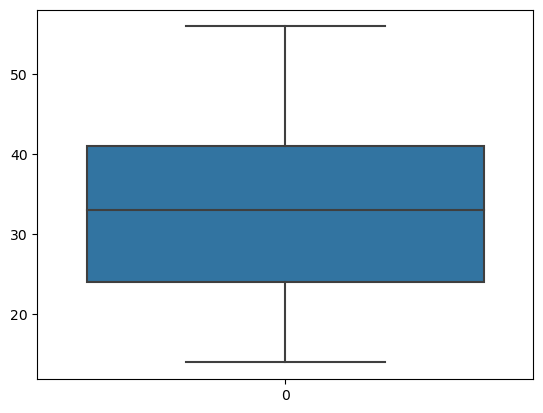

Annual_Income
AxesSubplot(0.125,0.11;0.775x0.77)


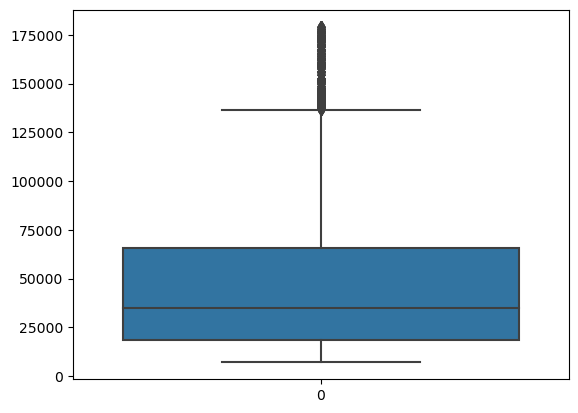

Monthly_Inhand_Salary
AxesSubplot(0.125,0.11;0.775x0.77)


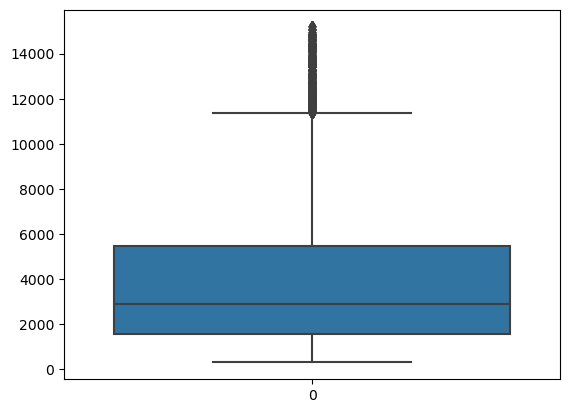

Num_Bank_Accounts
AxesSubplot(0.125,0.11;0.775x0.77)


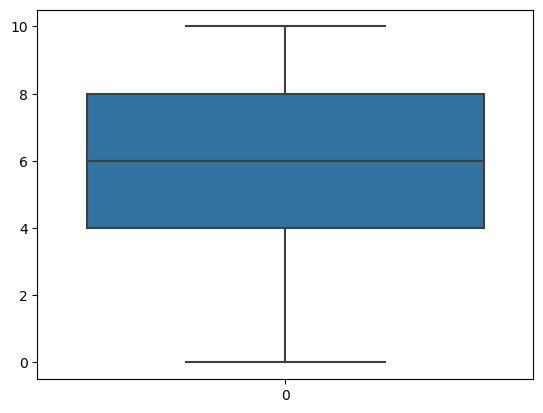

Num_Credit_Card
AxesSubplot(0.125,0.11;0.775x0.77)


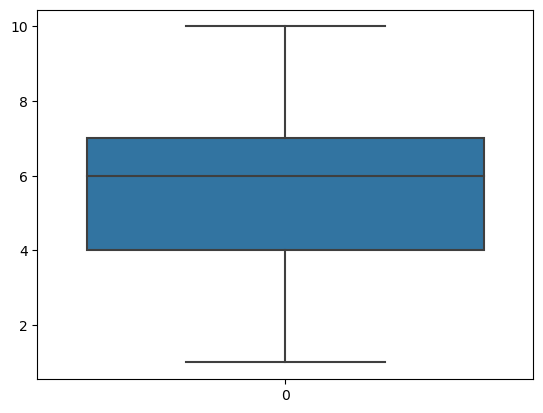

Num_of_Loan
AxesSubplot(0.125,0.11;0.775x0.77)


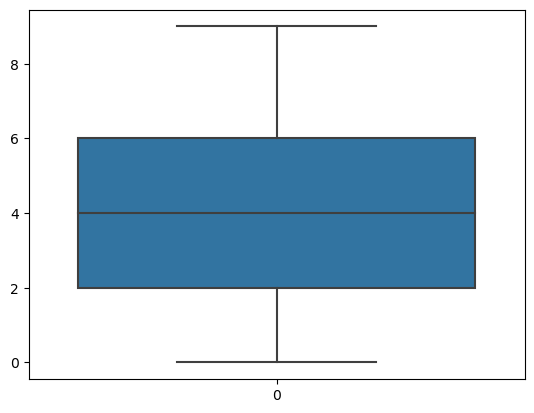

Delay_from_due_date
AxesSubplot(0.125,0.11;0.775x0.77)


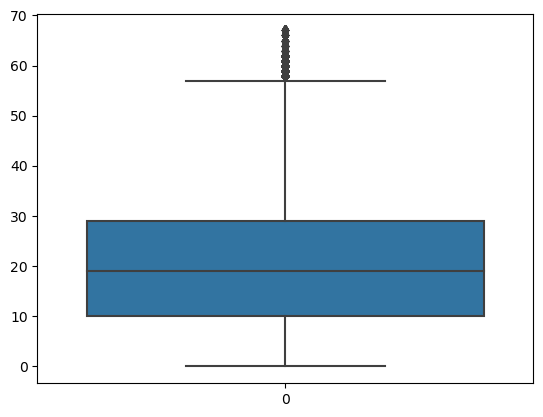

Num_of_Delayed_Payment
AxesSubplot(0.125,0.11;0.775x0.77)


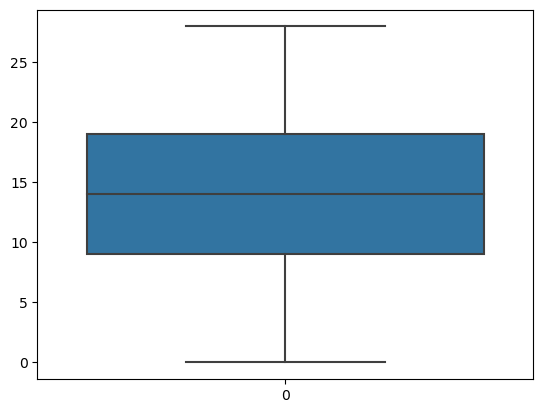

Changed_Credit_Limit
AxesSubplot(0.125,0.11;0.775x0.77)


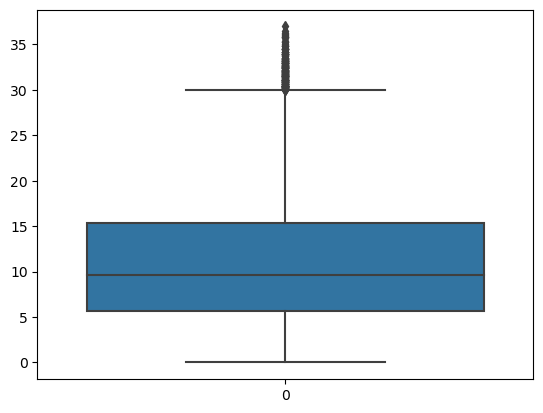

Num_Credit_Inquiries
AxesSubplot(0.125,0.11;0.775x0.77)


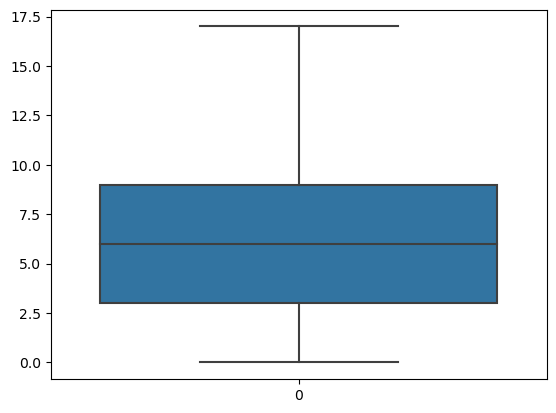

Outstanding_Debt
AxesSubplot(0.125,0.11;0.775x0.77)


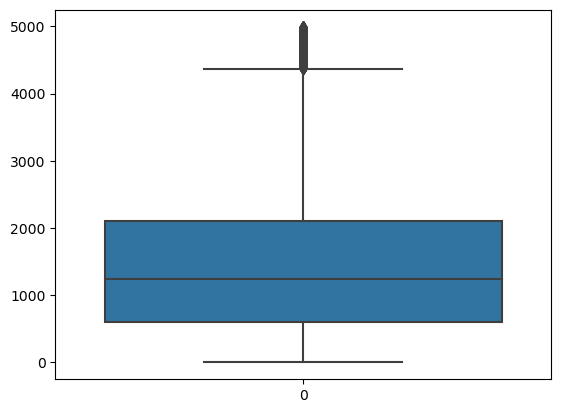

Credit_Utilization_Ratio
AxesSubplot(0.125,0.11;0.775x0.77)


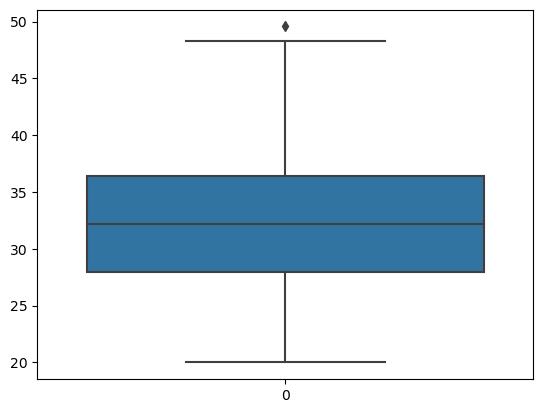

Total_EMI_per_month
AxesSubplot(0.125,0.11;0.775x0.77)


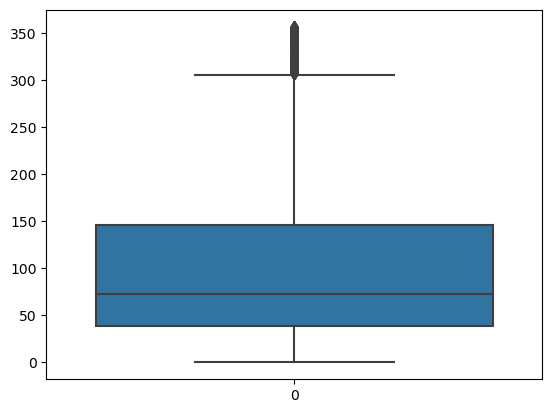

Amount_invested_monthly
AxesSubplot(0.125,0.11;0.775x0.77)


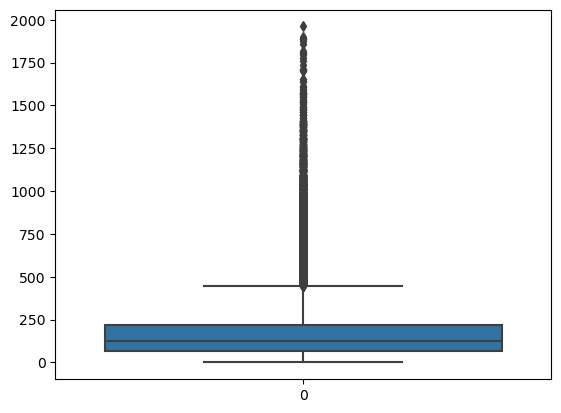

Monthly_Balance
AxesSubplot(0.125,0.11;0.775x0.77)


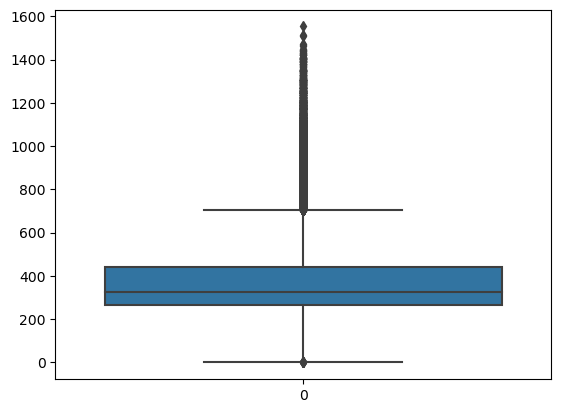

In [271]:
for i in df.select_dtypes('number'):
    print(i)
    print(sns.boxplot(df[i]))
    plt.show()

In [272]:
plt.figure(figsize=(15, 5 * 10))
plt.show()

<Figure size 1500x5000 with 0 Axes>

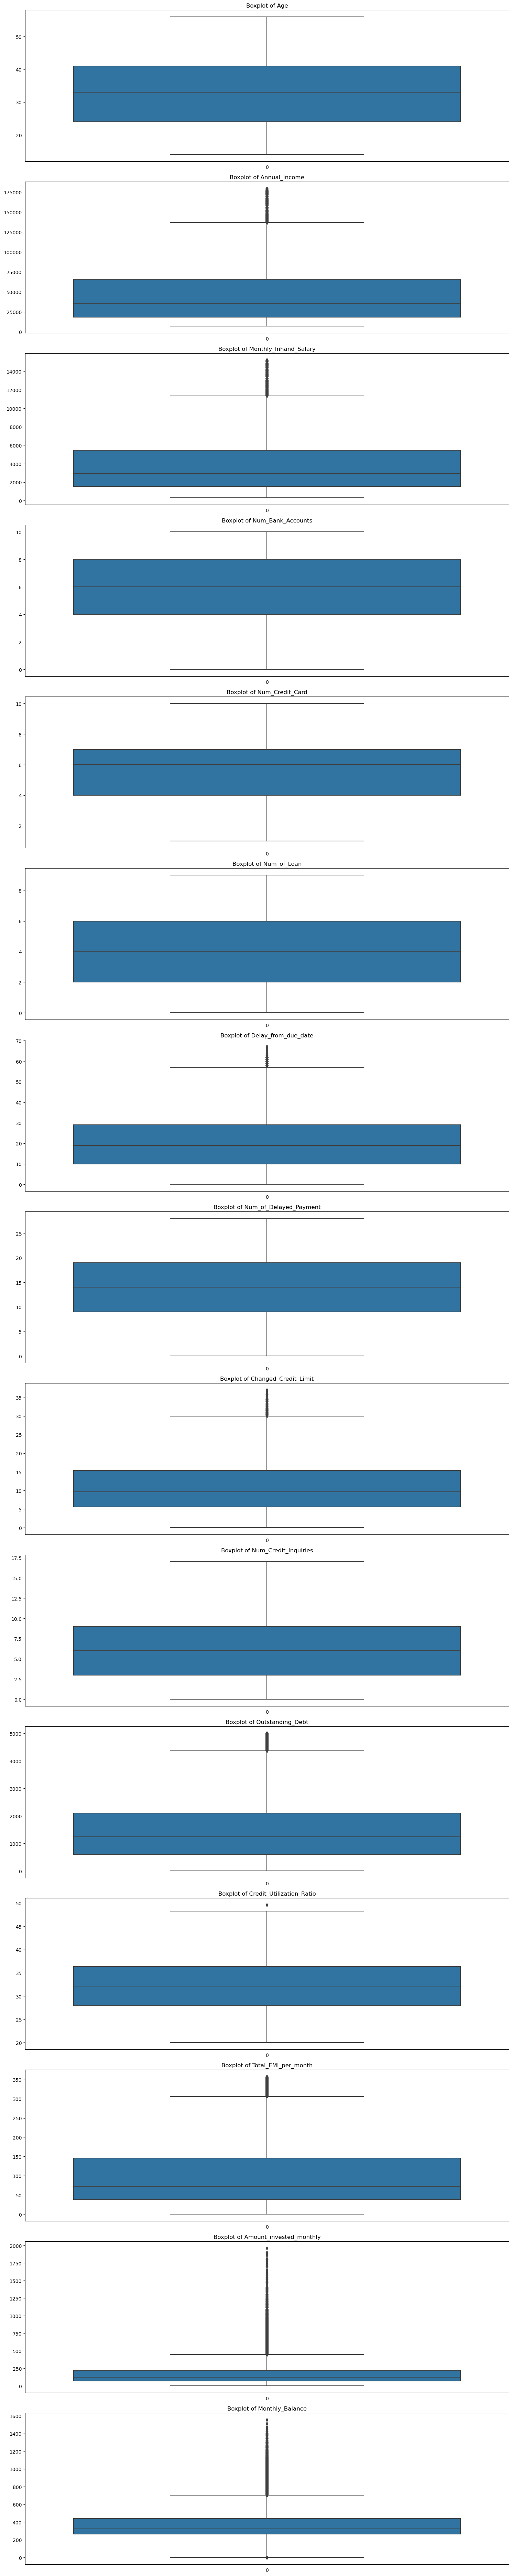

In [273]:
numerical_columns = df.select_dtypes('number').columns

# Number of numerical columns
num_columns = len(numerical_columns)

# Create a figure and a set of subplots
plt.figure(figsize=(15, 5 * num_columns))

# Iterate over each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_columns, 1, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

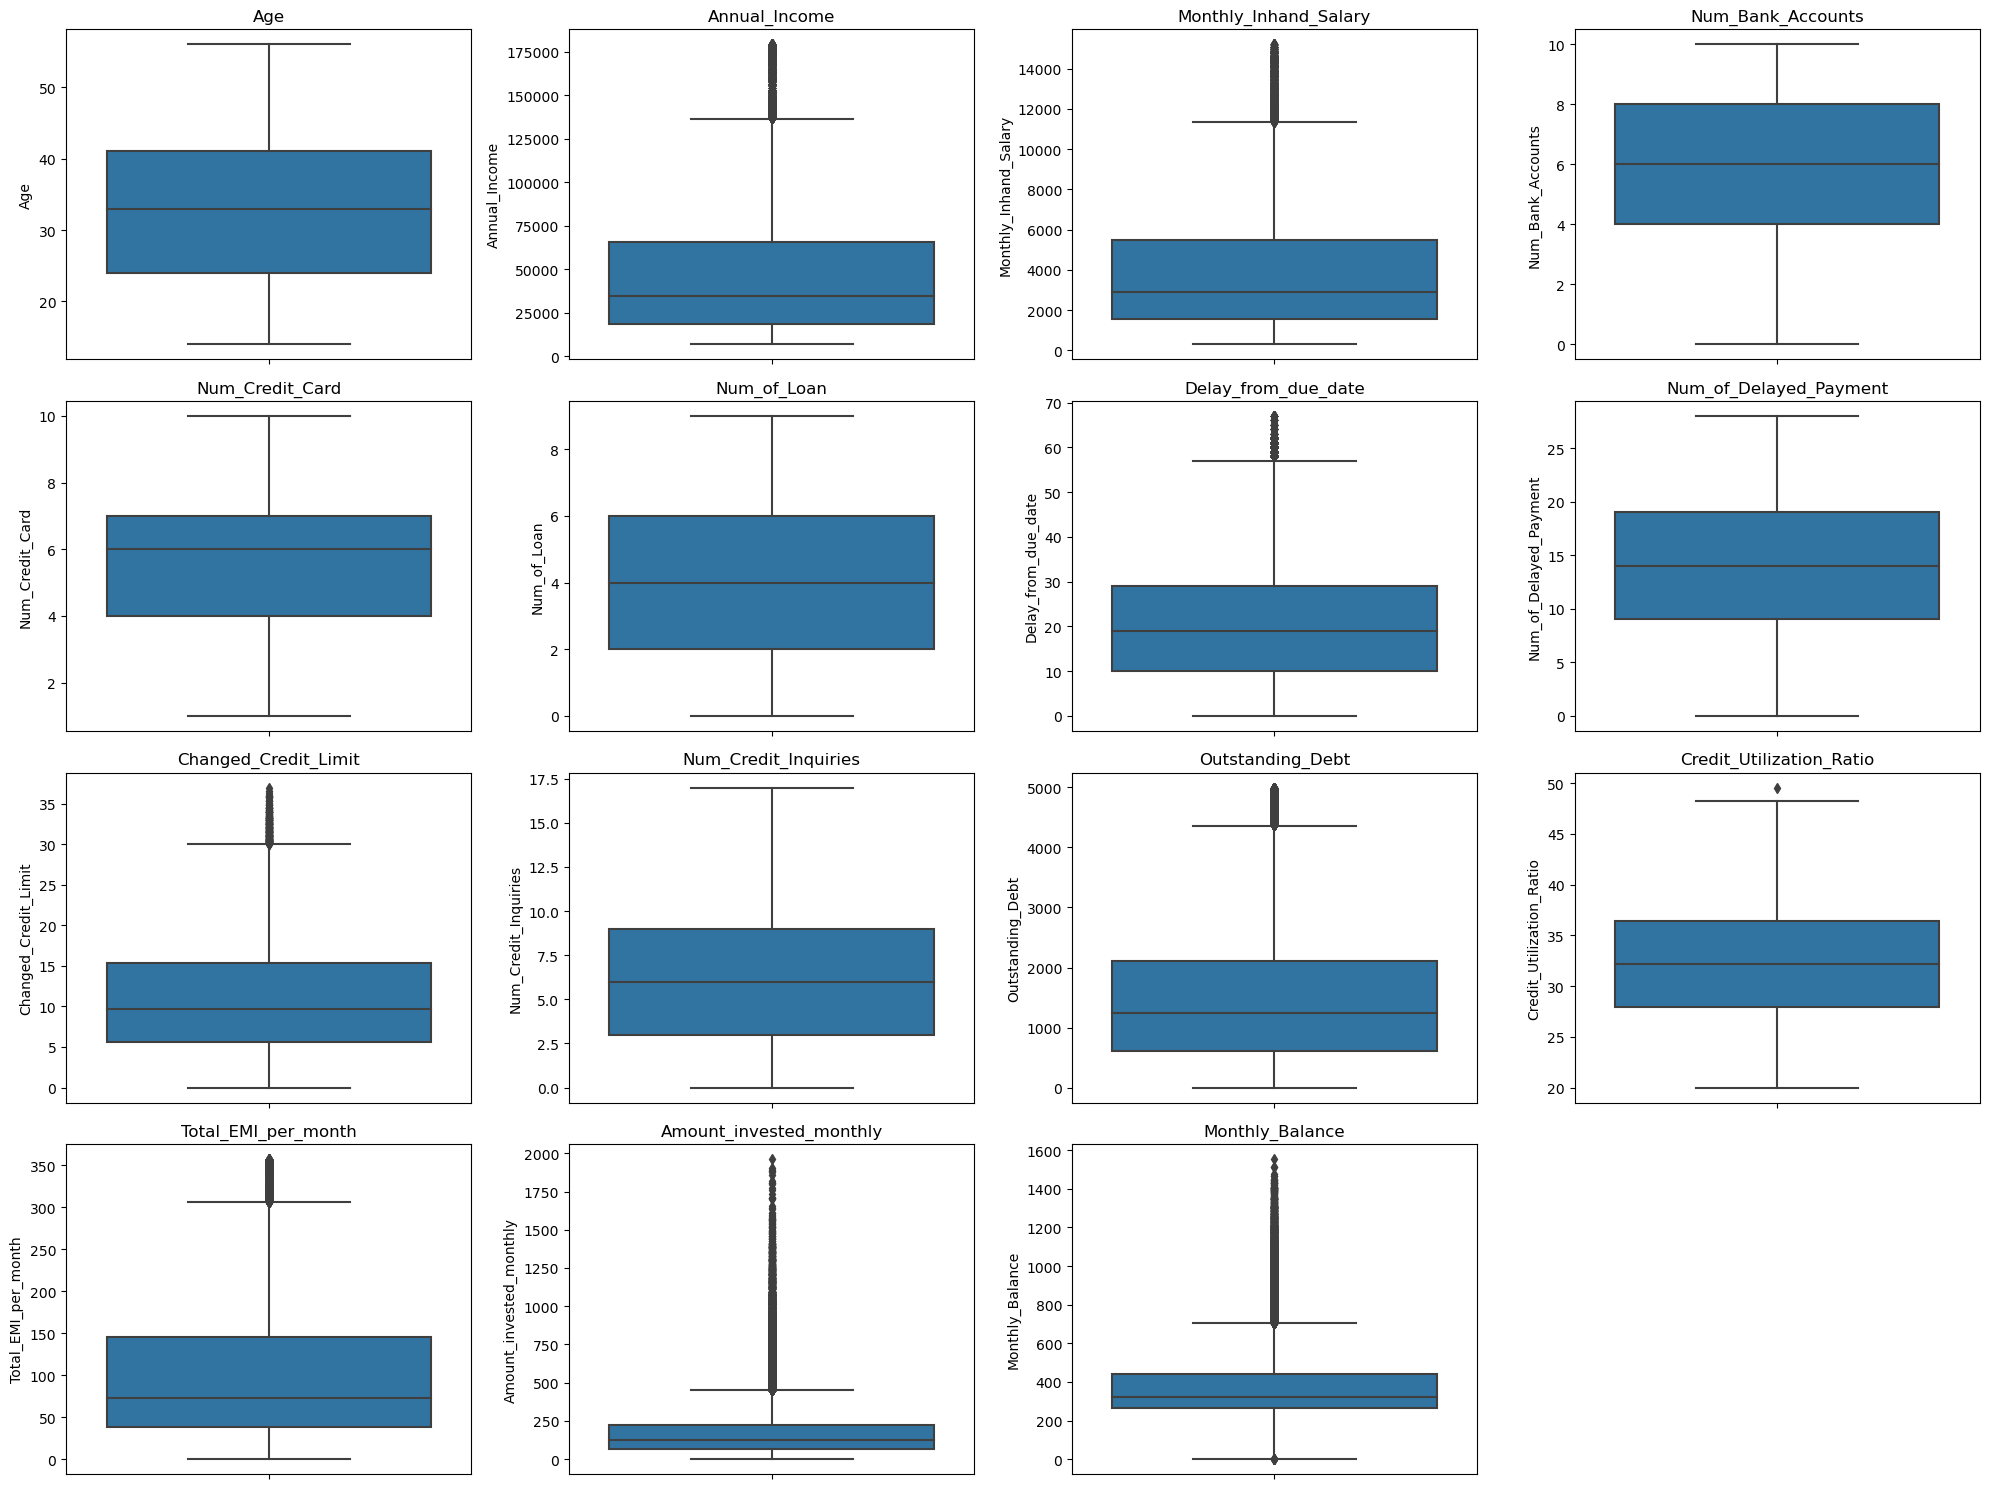

In [274]:
numerical_columns = df.select_dtypes('number').columns

# Number of rows and columns in the subplot grid
rows, cols = 4, 4

# Create a figure
plt.figure(figsize=(20, 15))

# Iterate over each numerical column and create a subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

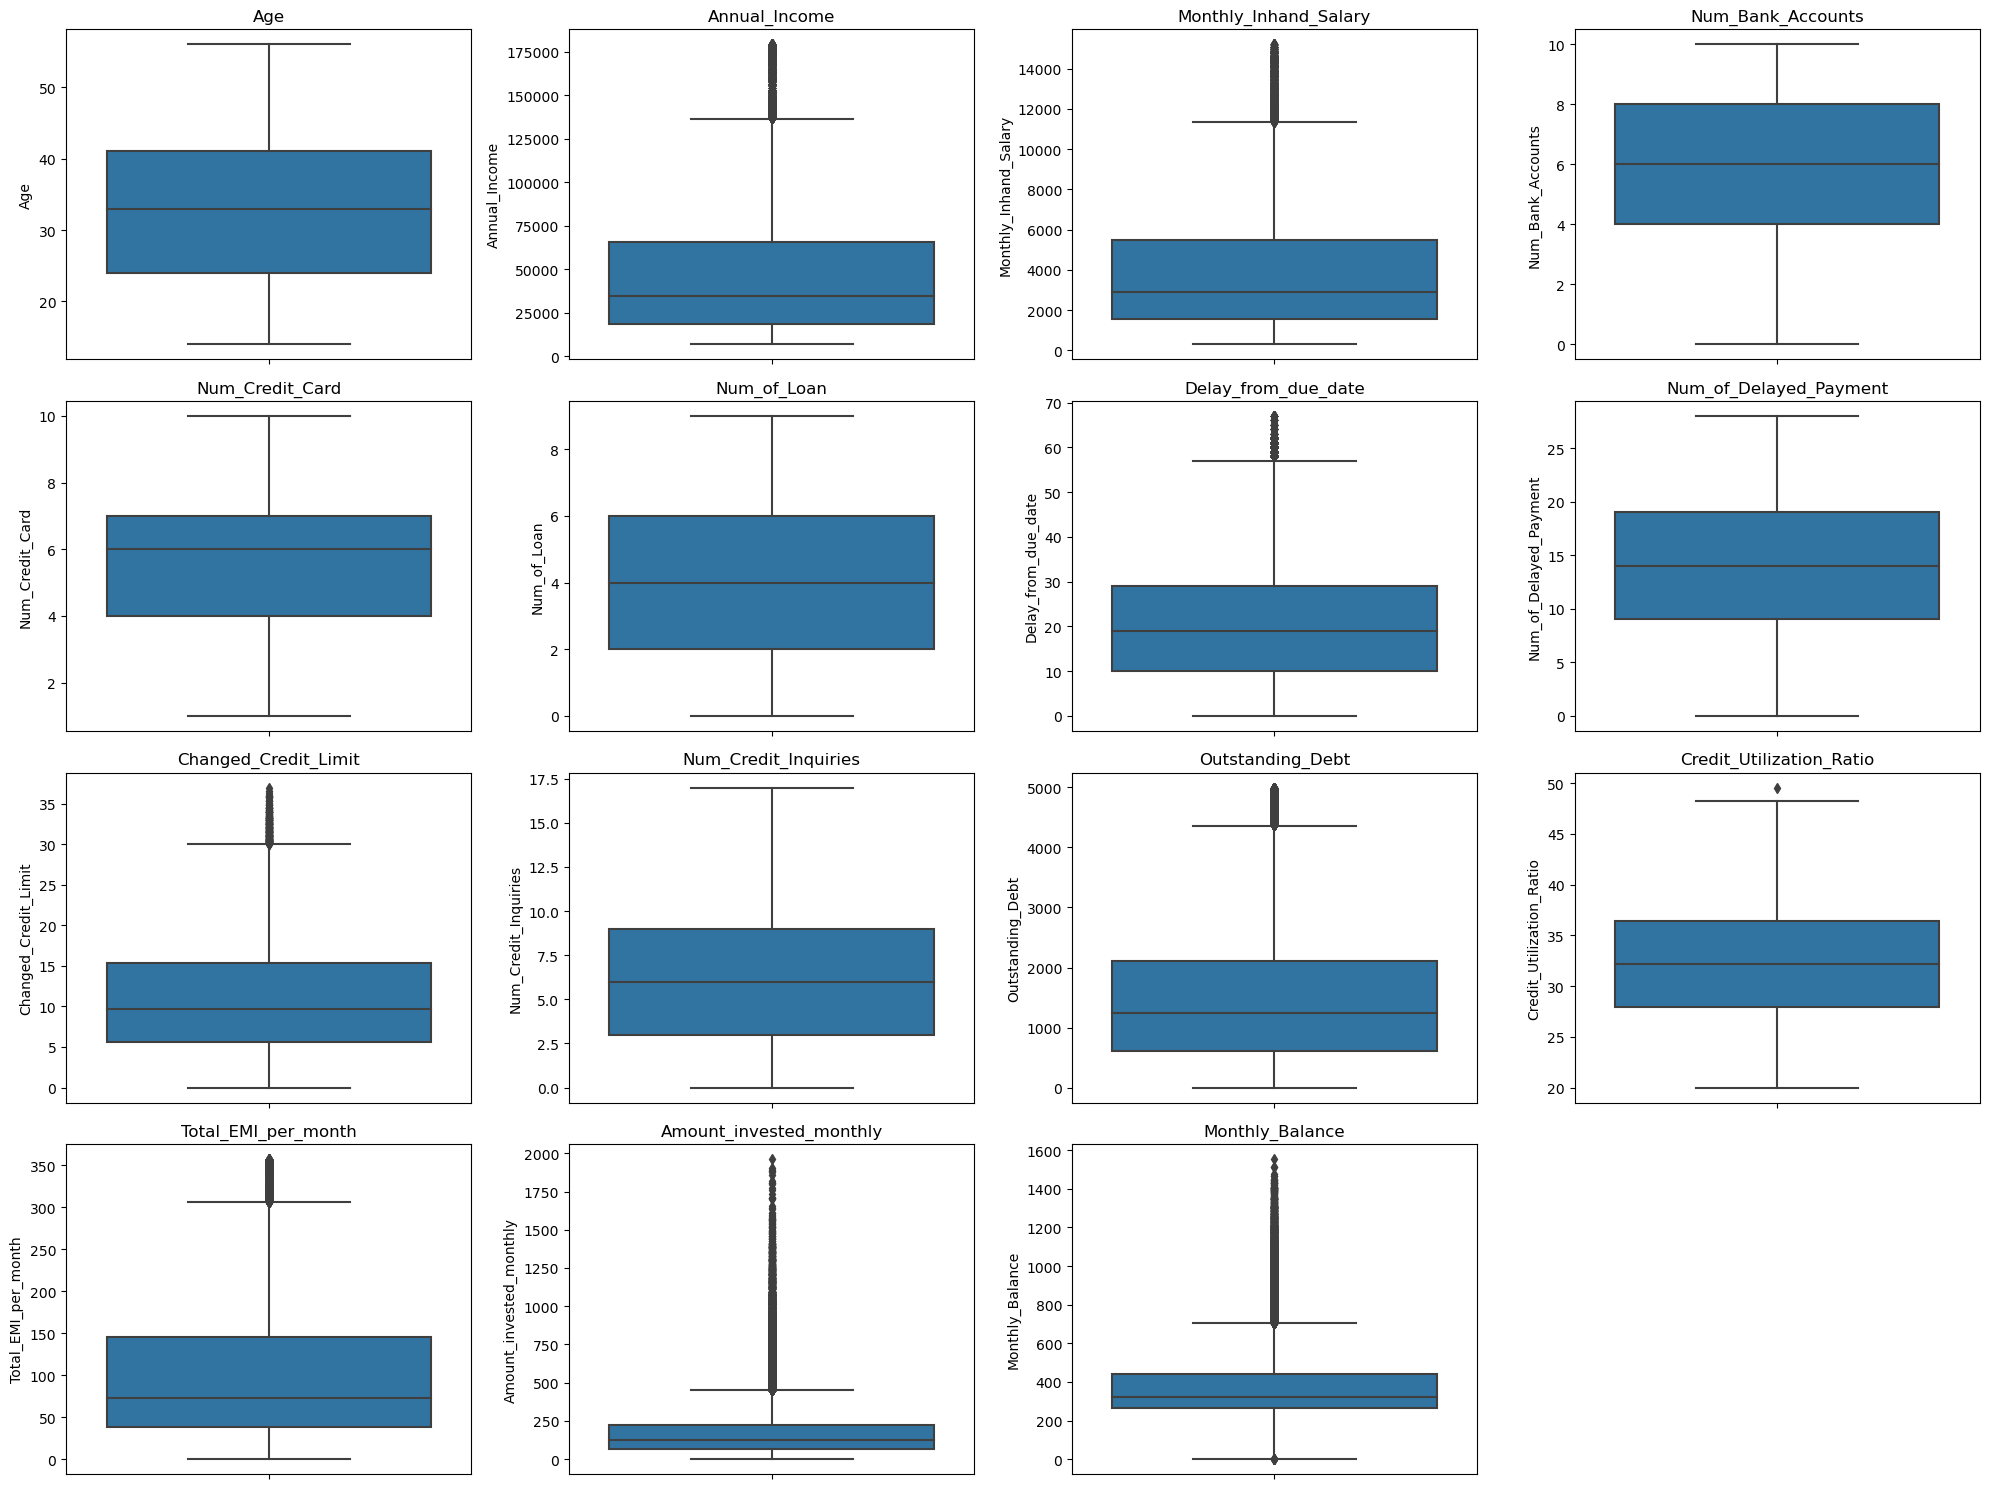

In [275]:
numerical_columns = temp.select_dtypes('number').columns

# Number of rows and columns in the subplot grid
rows, cols = 4, 4

# Create a figure
plt.figure(figsize=(20, 15))

# Iterate over each numerical column and create a subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

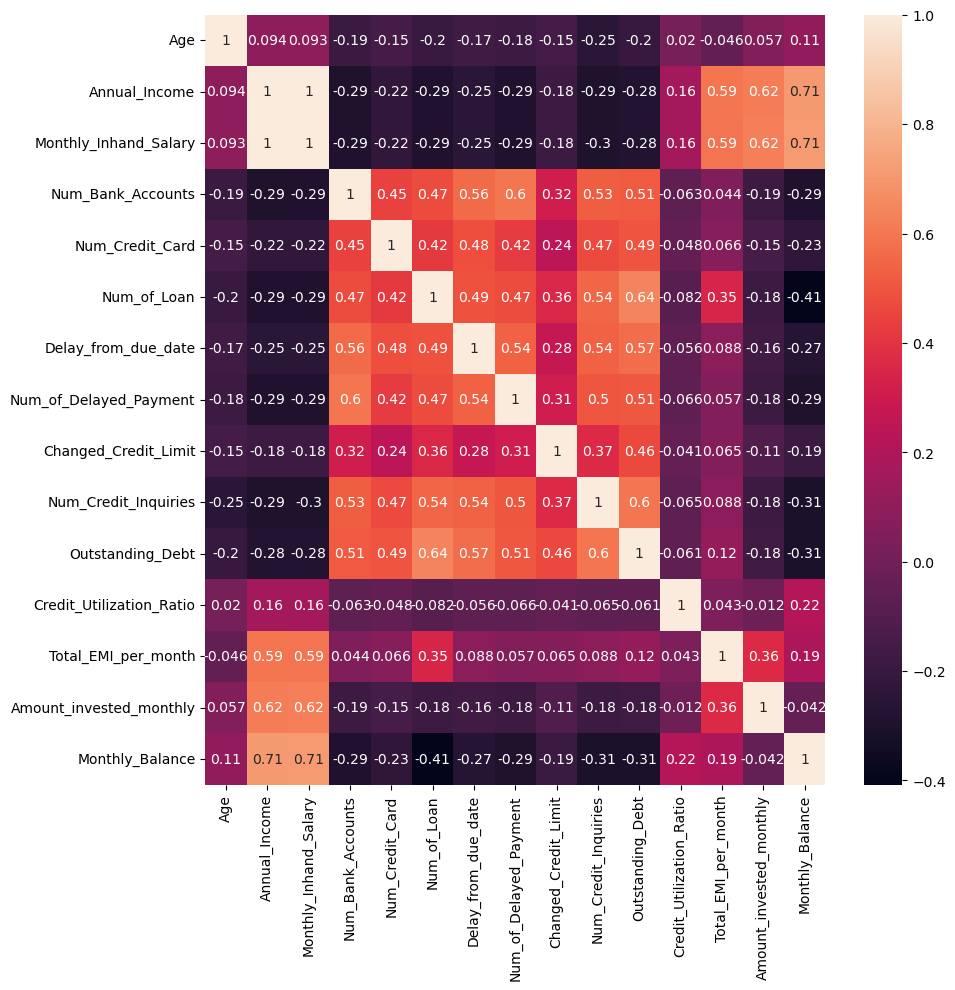

In [276]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [277]:
cleaned_data = temp.copy()

In [278]:
cleaned_data.to_csv('Cleaned_data.csv', index=False)

In [279]:
import os

In [280]:
os.getcwd()

'C:\\Users\\Vishal\\Documents\\Jupyter works\\capstone\\CreditScoreData'